# Predicting Confirmed Cases in India

![title](https://m.economictimes.com/thumb/msid-73752743,width-1200,height-900,resizemode-4,imgsize-649120/coronavirus-outbreak-china-shutdowns-hit-indian-electronics-companies.jpg)

# Notebook By: Deep Contractor

## The data is cleaned and uploaded to my github

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from time import time
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/chesterking123/PredictingCovid19India-Arima/master/datatill5apr.csv')

In [34]:
del df['Unnamed: 0']

In [35]:
df.size

201

In [36]:
df.describe()

,TotalConfirmed,TotalDeceased
count,67.000000,67.000000
mean,397.298507,10.074627
std,882.095491,24.606179
min,1.000000,0.000000
25%,3.000000,0.000000
50%,6.000000,0.000000
75%,228.000000,4.000000
max,4289.000000,121.000000


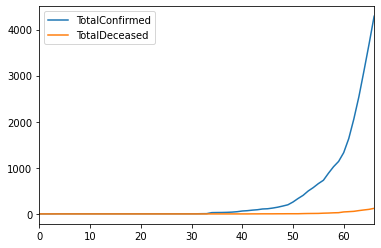

In [37]:
df.plot()

In [38]:
del df['TotalDeceased']

In [39]:
confirmedcases = df['TotalConfirmed'].to_list()
confirmedcases

[1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 6,
 28,
 30,
 31,
 34,
 39,
 48,
 63,
 70,
 82,
 91,
 107,
 112,
 127,
 146,
 171,
 198,
 258,
 334,
 403,
 497,
 571,
 657,
 730,
 883,
 1024,
 1139,
 1329,
 1635,
 2059,
 2545,
 3105,
 3684,
 4289]

In [40]:
plotconf = df['TotalConfirmed']

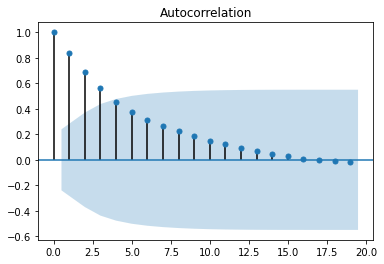

In [41]:
plot_acf(plotconf)
pyplot.show()

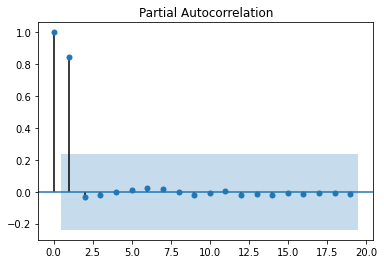

In [42]:
plot_pacf(plotconf)
pyplot.show()

In [43]:
model_arima=ARIMA(confirmedcases,(1,1,0))
model_arima_fit=model_arima.fit()
prediction_arima=model_arima_fit.forecast(10)[0]
prediction_arima

array([ 4892.34080519,  5494.03060662,  6094.07755488,  6692.48976036,
        7289.27529337,  7884.44218441,  8477.99842432,  9069.9519645 ,
        9660.31071708, 10249.08255515])

In [38]:
plotingconfirmed = df.copy()

In [39]:
oneweekdates = ['4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20','4/13/20','4/14/20','4/15/20']

In [40]:
j=1
for i in range(len(oneweekdates)):
    plotingconfirmed.loc[66+j,'Date'] = oneweekdates[i]
    plotingconfirmed.loc[66+j,'TotalConfirmed'] =int(prediction_arima[i])
    j=j+1

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 <a list of 10 Text major ticklabel objects>)

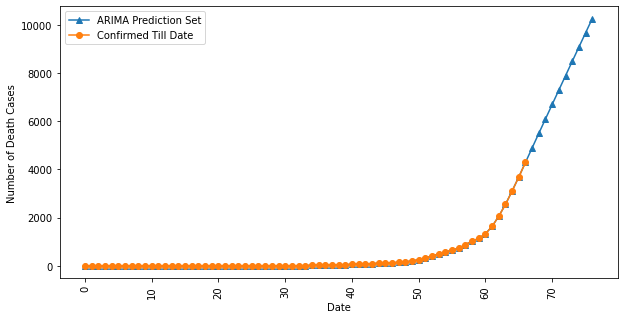

In [42]:
pyplot.figure(figsize=(10,5))
pyplot.plot(plotingconfirmed["TotalConfirmed"],label="ARIMA Prediction Set",marker="^")
pyplot.plot(df["TotalConfirmed"],label="Confirmed Till Date",marker="o")
pyplot.legend()
pyplot.xlabel("Date")
pyplot.ylabel("Number of Death Cases")
pyplot.xticks(rotation=90)